## importing libraries

In [15]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


## adding the dataset path 

In [16]:
file_path="/Users/mayurimamdi/Downloads/social_media_viral_content_dataset.csv"

In [17]:
df=pd.read_csv(file_path)

## Analyzing the dataset 

In [18]:
df.head(10)

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,SM_100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,SM_100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,SM_100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,SM_100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,SM_100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1
5,SM_100005,Instagram,carousel,Sports,hi,Brazil,2024-11-01 00:00:00,#tech #music,6513472,465248,27485,25659,0.0796,-0.907,1
6,SM_100006,X,text,Education,hi,UK,2024-06-09 00:00:00,#tech #ai,65481,2847,194,84655,1.3393,-0.235,0
7,SM_100007,X,text,Technology,es,Pakistan,2024-07-26 00:00:00,#trending #tech #news,2961423,329047,31556,11395,0.1256,0.215,1
8,SM_100008,YouTube Shorts,text,Sports,es,Pakistan,2024-03-03 00:00:00,#music #tech #news #trending,3916736,489592,14507,87314,0.1510,0.884,1
9,SM_100009,YouTube Shorts,video,Politics,en,US,2024-10-05 00:00:00,#music #trending #ai #viral #news,3116477,239729,8438,43002,0.0934,-0.968,1


In [19]:
df.shape

(2000, 15)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          2000 non-null   object 
 1   platform         2000 non-null   object 
 2   content_type     2000 non-null   object 
 3   topic            2000 non-null   object 
 4   language         2000 non-null   object 
 5   region           2000 non-null   object 
 6   post_datetime    2000 non-null   object 
 7   hashtags         2000 non-null   object 
 8   views            2000 non-null   int64  
 9   likes            2000 non-null   int64  
 10  comments         2000 non-null   int64  
 11  shares           2000 non-null   int64  
 12  engagement_rate  2000 non-null   float64
 13  sentiment_score  2000 non-null   float64
 14  is_viral         2000 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 234.5+ KB


In [49]:
df['platform'].unique()

array(['Instagram', 'YouTube Shorts', 'X', 'TikTok'], dtype=object)

In [50]:
df['topic'].unique()

array(['Sports', 'Technology', 'Politics', 'Education', 'Entertainment',
       'Lifestyle'], dtype=object)

In [51]:
df['language'].value_counts()

language
en    420
ur    405
fr    404
hi    392
es    379
Name: count, dtype: int64

In [52]:
df['region'].value_counts()

region
US          428
India       406
Brazil      402
UK          385
Pakistan    379
Name: count, dtype: int64

## Dataset cleaning processing 

In [47]:
df.duplicated().sum()

np.int64(0)

In [46]:
df.isnull().sum()

post_id            0
platform           0
content_type       0
topic              0
language           0
region             0
post_datetime      0
hashtags           0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
sentiment_score    0
is_viral           0
dtype: int64

Since there is not duplicates or no null values we are skipping the cleaning part 

## Feature Engineering 

#### Changing the post id into integer 

In [ ]:
df['post_id'].str.split('_').str[1]

0       100000
1       100001
2       100002
3       100003
4       100004
         ...  
1995    101995
1996    101996
1997    101997
1998    101998
1999    101999
Name: post_id, Length: 2000, dtype: object

In [55]:
df['post_id']=df['post_id'].str.split('_').str[1]

#### Changing platform into numeric values // categorical to numeric

we need to do one hot encoding as label encoding will not be better for predictions 

In [58]:
platform_dummies=pd.get_dummies(df['platform']).astype(int)

In [59]:
platform_dummies.head(10)

,Instagram,TikTok,X,YouTube Shorts
0,1,0,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
5,1,0,0,0
6,0,0,1,0
7,0,0,1,0
8,0,0,0,1
9,0,0,0,1


In [61]:
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,views,likes,comments,shares,engagement_rate,sentiment_score,is_viral
0,100000,Instagram,text,Sports,ur,UK,2024-12-10 00:00:00,#tech #funny #music,2319102,122058,15800,861,0.0598,0.464,1
1,100001,Instagram,carousel,Sports,ur,Brazil,2024-10-13 00:00:00,#news #fyp #funny #ai #trending,2538464,110368,11289,54887,0.0695,-0.800,1
2,100002,YouTube Shorts,video,Technology,ur,UK,2024-05-03 00:00:00,#ai #news,1051176,87598,47196,44132,0.1702,0.416,0
3,100003,X,text,Politics,ur,US,2024-08-04 00:00:00,#ai #funny,5271440,329465,774,59736,0.0740,0.877,1
4,100004,YouTube Shorts,text,Education,es,US,2024-03-28 00:00:00,#news #ai #viral #funny #fyp,3186256,199141,5316,83105,0.0903,0.223,1


In [ ]:
df_p = pd.concat([df,platform_dummies], axis = 1)

## EDA

In [24]:
count=df.value_counts()

In [41]:
platform_counts=df['platform'].value_counts().reset_index()
platform_names=df['platform'].value_counts().index
platform_counts.columns = ['platform', 'post_count']

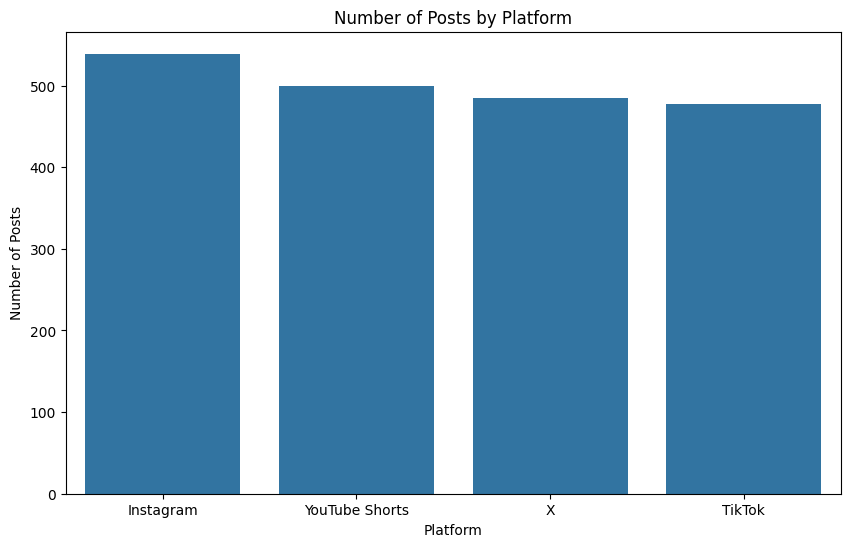

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_counts, x='platform', y='post_count')

plt.title("Number of Posts by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.show()

In [43]:
platform_region_counts = (df[['platform', 'region']].value_counts().reset_index(name='post_count'))


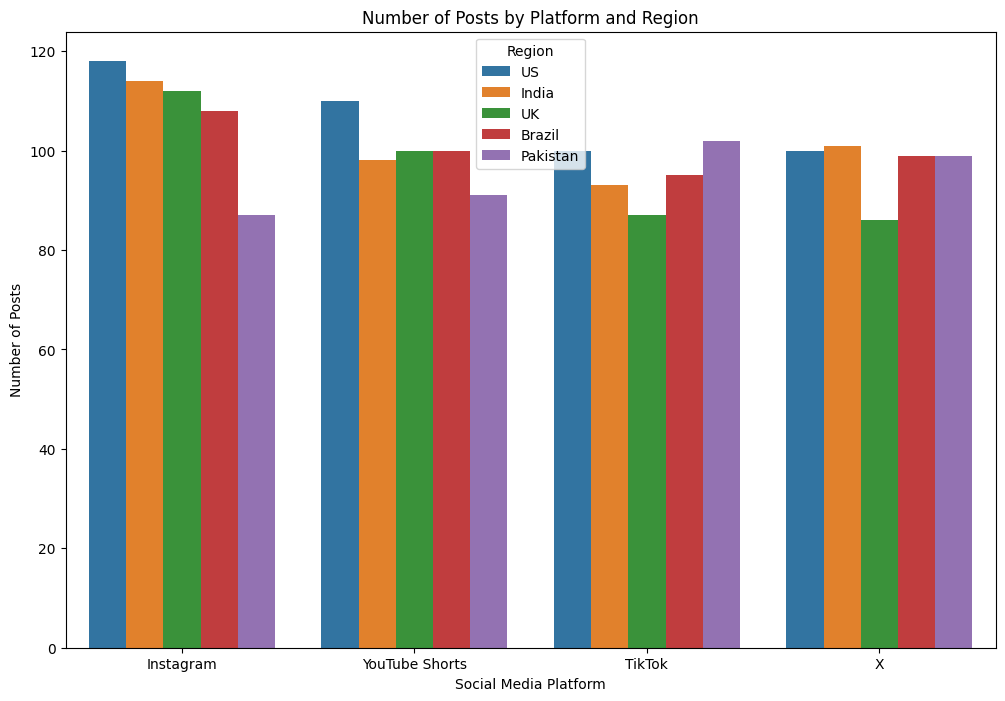

In [44]:
plt.figure(figsize=(12, 8))

sns.barplot(
    data=platform_region_counts,
    x='platform',
    y='post_count',
    hue='region'
)

plt.title("Number of Posts by Platform and Region")
plt.xlabel("Social Media Platform")
plt.ylabel("Number of Posts")
plt.legend(title="Region")
plt.show()
